In [57]:
import h5py
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [42]:
V_input_dir = "/Volumes/Research/GWNMMAD_data/source/V1/"
H_input_dir = "/Volumes/Research/GWNMMAD_data/source/H1/"
L_input_dir = "/Volumes/Research/GWNMMAD_data/source/L1/"
downsampled_output_dir = "/Volumes/Research/GWNMMAD_data/Downsampled/V1/"


V_file_list = ["V-V1_GWOSC_O2_4KHZ_R1-1187672064-4096.1","V-V1_GWOSC_O2_4KHZ_R1-1187676160-4096","V-V1_GWOSC_O2_4KHZ_R1-1187680256-4096","V-V1_GWOSC_O2_4KHZ_R1-1187692544-4096","V-V1_GWOSC_O2_4KHZ_R1-1187684352-4096","V-V1_GWOSC_O2_4KHZ_R1-1187688448-4096"]
H_file_list = ["H-H1_GWOSC_O2_4KHZ_R1-1174958080-4096","H-H1_GWOSC_O2_4KHZ_R1-1174962176-4096","H-H1_GWOSC_O2_4KHZ_R1-1174966272-4096","H-H1_GWOSC_O2_4KHZ_R1-1174970368-4096","H-H1_GWOSC_O2_4KHZ_R1-1174974464-4096","H-H1_GWOSC_O2_4KHZ_R1-1174978560-4096"]
L_file_list = ["L-L1_GWOSC_O2_4KHZ_R1-1187270656-4096","L-L1_GWOSC_O2_4KHZ_R1-1187274752-4096","L-L1_GWOSC_O2_4KHZ_R1-1187278848-4096","L-L1_GWOSC_O2_4KHZ_R1-1187282944-4096","L-L1_GWOSC_O2_4KHZ_R1-1187287040-4096","L-L1_GWOSC_O2_4KHZ_R1-1187291136-4096"]


In [44]:
output_list = []
for i in range(len(L_file_list)):
    f = h5py.File(L_input_dir+L_file_list[i]+".hdf5",'r')
    strain = f['strain']['Strain']
    average = 0
    for j,item in tqdm(enumerate(range(len(strain))), desc = "Processing"):
        average += strain[j]
        
        if j%4 == 3:
            average = average / 4
            output_list.append(average)
            average = 0
    
output = pd.DataFrame(output_list)
output.to_csv(downsampled_output_dir+L_file_list[i]+"_downsampled.csv",header=None, index=None)
    

Processing: 16777216it [00:21, 775258.16it/s]
Processing: 16777216it [00:21, 779265.75it/s]
Processing: 16777216it [00:21, 775202.82it/s]
Processing: 16777216it [00:21, 774968.60it/s]
Processing: 16777216it [00:21, 767241.87it/s]
Processing: 16777216it [00:21, 767461.81it/s]


Let's print a plot

In [80]:
df = pd.read_csv(downsampled_output_dir+V_file_list[i]+"_downsampled.csv",header=None)

In [81]:
data = df[0]
y = data.to_numpy()
x = np.arange(len(y))/1024.0



In [94]:
y = np.reshape(y,(-1, 1024))
assert  y.shape[1] == 1024

In [79]:
f = h5py.File(H_input_dir+H_file_list[4]+".hdf5",'r')
data = f['strain']['Strain']
for k in range(len(data)):
    if data[k] > 4e-18:
        print(data[k])
        print(k)

4.014703622304127e-18
2948748
4.1037961049814445e-18
2948749
4.19768808802676e-18
2948750
4.283047442026129e-18
2948751
4.365779619167473e-18
2948752
4.453435043049782e-18
2948753
4.542210417112596e-18
2948754
4.624131246871075e-18
2948755
4.705128156405968e-18
2948756
4.791534099443576e-18
2948757
4.879738423643364e-18
2948758
4.965224911949693e-18
2948759
5.044038988114825e-18
2948760
5.127039073779094e-18
2948761
5.2121679075505834e-18
2948762
5.2909034575847456e-18
2948763
5.36989753407183e-18
2948764
5.448933396969542e-18
2948765
5.532266552588722e-18
2948766
5.6158145059696815e-18
2948767
5.689791631086e-18
2948768
5.765585546202041e-18
2948769
5.8458846167355425e-18
2948770
5.919948948585887e-18
2948771
5.99138944509718e-18
2948772
6.0671431388072874e-18
2948773
6.1439531191263895e-18
2948774
6.218467243143722e-18
2948775
6.288737930647915e-18
2948776
6.358426812697053e-18
2948777
6.430668422643003e-18
2948778
6.4974016812491644e-18
2948779
6.5626219893915535e-18
2948780
6.63033

In [67]:
y[y<-4e-18]

array([-4.06864501e-18, -4.14927332e-18, -4.22374134e-18, -4.28661661e-18,
       -4.34177086e-18, -4.38415778e-18, -4.41912737e-18, -4.43961408e-18,
       -4.45312526e-18, -4.45027617e-18, -4.44100882e-18, -4.41398933e-18,
       -4.38007663e-18, -4.32869946e-18, -4.26891427e-18, -4.19174276e-18,
       -4.10504625e-18, -4.00323769e-18, -4.31634207e-18, -4.63207023e-18,
       -4.92028064e-18, -5.18945433e-18, -5.43073799e-18, -5.65255289e-18,
       -5.84689942e-18, -6.02046750e-18, -6.16687727e-18, -6.29347569e-18,
       -6.39376511e-18, -6.47332327e-18, -6.52880444e-18, -6.56319477e-18,
       -6.57500595e-18, -6.56600106e-18, -6.53599109e-18, -6.48702044e-18,
       -6.41762253e-18, -6.33158579e-18, -6.22585869e-18, -6.10554523e-18,
       -5.96568623e-18, -5.81303235e-18, -5.64428850e-18, -5.46285498e-18,
       -5.26841432e-18, -5.06148407e-18, -4.84388484e-18, -4.61513652e-18,
       -4.37968159e-18, -4.13219171e-18])

In [68]:
y[y>4e-18]

<method-wrapper '__index__' of numpy.ndarray object at 0x2b50df090>

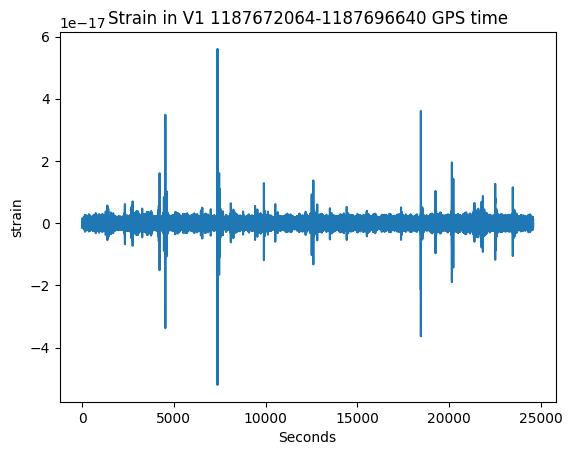

In [82]:
plt.plot(x,y)
plt.title("Strain in V1 1187672064-1187696640 GPS time")
plt.xlabel("Seconds")
plt.ylabel("strain")

plt.show()

In [100]:
abbcc = np.array([1,2,3,4,5,6]).reshape(-1,2)
abbcc[0:1]

array([[1, 2]])